In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

▲预先运行的代码

In [2]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/'
file = 'iris.data'
cols = ['sepal_length','sepal_width','petal_length','petal_width','class']
df = pd.read_csv(path + file, header=None, names=cols)

In [3]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


▲ 程序清单 9.1 数据的读取

In [4]:
df.shape

(150, 5)

▲ 程序清单 9.2 DataFrame 对象的 shape 属性

In [5]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

▲ 程序清单 9.3 Series 对象的 value_counts 方法

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


▲ 程序清单 9.4 DataFrame 对象的 info 方法

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


▲ 程序清单 9.5 DataFrame 对象的 describe 方法

In [8]:
df.groupby('class').mean()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


▲  程序清单 9.6 DataFrame 对象的 groupby 方法

In [9]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

▲ 程序清单 9.7 DataFrame 对象的 isna 方法

In [10]:
def outlier(ser):
    mean = ser.mean()
    std = ser.std(ddof=0)
    zscore = (ser - mean) /std
    outliers = ser[(zscore < -3) | (zscore > 3)]
    if outliers.shape[0] == 0:
        print('未发现离群值')
    else:
        print(outliers)

▲ 程序清单 9.8 定义查找离群值的函数

In [11]:
outlier(df['sepal_length'])

未发现离群值


▲ 程序清单 9.9 离群值的查找（花萼的长度）

In [12]:
outlier(df['sepal_width'])

15    4.4
Name: sepal_width, dtype: float64


▲ 程序清单 9.10 离群值的查找（花萼的宽度）　

In [13]:
df['sepal_width'].mean(), df['sepal_width'].std()

(3.0540000000000003, 0.4335943113621737)

▲程序清单 9.11 Series 对象的 mean 方法和 std 方法

In [14]:
outlier(df['petal_width'])
outlier(df['petal_length'])

未发现离群值
未发现离群值


▲  程序清单 9.12 离群值的查找（花瓣的宽度和长度）

In [15]:
df[df.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,class
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


▲ 程序清单 9.13 DataFrame 对象的 duplicated 方法

In [16]:
df.iloc[34,:-1] = [4.9, 3.1, 1.5, 0.2]
df.iloc[37,:-1] = [4.9, 3.6, 1.4, 0.1]

▲ 程序清单 9.14 重复数据的修改

In [17]:
df[df.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,class
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


▲  程序清单 9.15 DataFrame 对象的 duplicated 方法（重新引用）

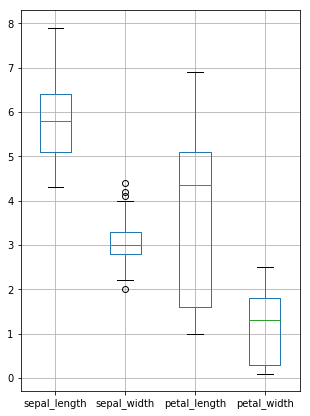

In [18]:
df.plot(kind='box', figsize=(5,7), grid=True)

▲  程序清单 9.16 DataFrame 对象的 plot 方法（kind='box'）

In [19]:
vers = df[df['class'] == 'Iris-versicolor']
virg = df[df['class'] == 'Iris-virginica']
seto = df[df['class'] == 'Iris-setosa']

print(vers.shape, virg.shape, seto.shape)

(50, 5) (50, 5) (50, 5)


▲程序清单 9.17 按品种分离成 DataFrame 对象

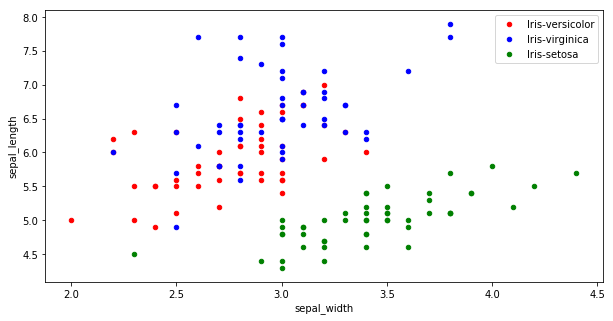

In [20]:
k, x, y = 'scatter', 'sepal_width', 'sepal_length'
ls = ['Iris-versicolor','Iris-virginica','Iris-setosa']
ax1 = vers.plot(kind=k, x=x, y=y, label=ls[0], color='r', figsize=(10,5))
virg.plot(kind=k, x=x, y=y, label=ls[1], color='b', ax=ax1)
seto.plot(kind=k, x=x, y=y, label=ls[2], color='g', ax=ax1)

▲程序清单 9.19 按颜色区分品种的散点图（x 轴为 petal_width、y 轴为 petal_length）

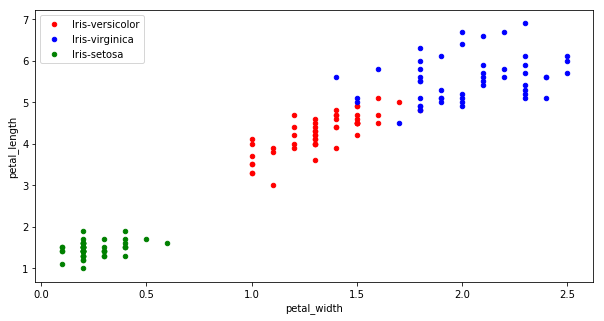

In [21]:
x, y = 'petal_width', 'petal_length'
ax1 = vers.plot(kind=k, x=x, y=y, label=ls[0], color='r', figsize=(10,5))
virg.plot(kind=k, x=x, y=y, label=ls[1], color='b', ax=ax1)
seto.plot(kind=k, x=x, y=y, label=ls[2], color='g', ax=ax1)

▲ 程序清单 9.20 将标识颜色的字符串保存到列表中

In [22]:
colors = ['g']*50 + ['r']*50 + ['b']*50
len(colors) == len(df)

True

▲ リスト 9.20 : マーカー色の文字列をリストに格納

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002821AD97A90>,
      dtype=object)

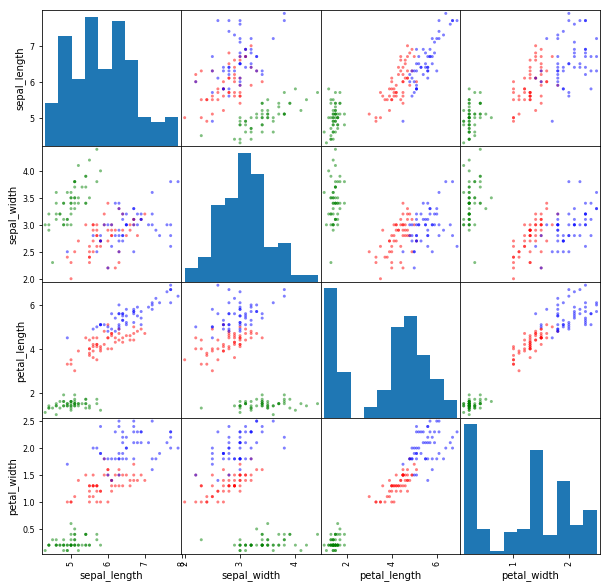

In [23]:
pd.plotting.scatter_matrix(df, color=colors, figsize=(10,10))

▲ 程序清单 9.21 scatter_matrix 方法

In [26]:
df.corr().style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1,-0.11757,0.871754,0.817941
sepal_width,-0.11757,1,-0.42844,-0.366126
petal_length,0.871754,-0.42844,1,0.962865
petal_width,0.817941,-0.366126,0.962865,1


▲ 程序清单 9.22 使用 DataFrame 对象中 corr 方法的热图